# Emergency 911 Calls - Exploratory Data Analysis
#By- Aarush Kumar
#Dated: July 25,2021

In [1]:
from IPython.display import Image
Image(url='https://www.teahub.io/photos/full/307-3075398_911-dispatcher-hangs-up-on-life-911-emergency.jpg')

In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/home/aarush100616/Downloads/Projects/Emergency 911 Calls/911.csv')

In [4]:
df

lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE...  19403.0   
663519  HAVERFORD STATION RD;  LOWER MERION; Station 3...  19041.0   
663520  MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...  19401.0   
663521  HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...  19041.0   

                              title            timeStamp                twp  \
0            EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1           EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2               Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3            EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4                    EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   
...                             ...                  ...                ...   
663517  Traffic: VEHICLE ACCIDENT -  2020-07-29 15:46:51      EAST NORRITON   
663518        EMS: GENERAL WEAKNESS  2020-07-29 15:52:19   LOWER PROVIDENCE   
663519        EMS: VEHICLE ACCIDENT  2020-07-29 15:52:52       LOWER MERION   
663520          Fire: BUILDING FIRE  2020-07-29 15:54:08         NORRISTOWN   
663521  Traffic: VEHICLE ACCIDENT -  2020-07-29 15:52:46       LOWER MERION   

                                           addr  e  
0                        REINDEER CT & DEAD END  1  
1                    BRIAR PATH & WHITEMARSH LN  1  
2                                      HAWS AVE  1  
3                            AIRY ST & SWEDE ST  1  
4                      CHERRYWOOD CT & DEAD END  1  
...                                         ... ..  
663517                SUNSET AVE & WOODLAND AVE  1  
663518              EAGLEVILLE RD & BUNTING CIR  1  
663519                     HAVERFORD STATION RD  1  
663520                   MARSHALL ST & HAWS AVE  1  
663521  HAVERFORD STATION RD & W MONTGOMERY AVE  1  

[663522 rows x 9 columns]

In [5]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [8]:
df.shape

(663522, 9)

In [9]:
df.size

5971698

In [10]:
df.columns.values

array(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr',
       'e'], dtype=object)

In [11]:
df = df.drop('e',axis=1)

In [12]:
df['zip'].nunique()

204

### What are the top 5 zip codes for 911 calls?

In [13]:
df_zip = pd.DataFrame(df['zip'].value_counts().head(5))
df_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
df_zip.style.background_gradient(cmap='Blues')

### What are the top 5 townships (twp) for 911 calls?

In [14]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
df_twp.style.background_gradient(cmap='Greens')

In [15]:
df['title'].nunique()

148

## Creating new features

In [16]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [17]:
df['title_code'] = df['title'].apply(lambda title: title.split(':')[1])

## Exploratory Data Analysis (EDA)

In [18]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='reason', data=df, order=df['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')
df['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')
sns.despine(bottom=False, left=True)

## Overall 911 Emregency Calls

In [20]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

### Traffic 911 Emergency Calls

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

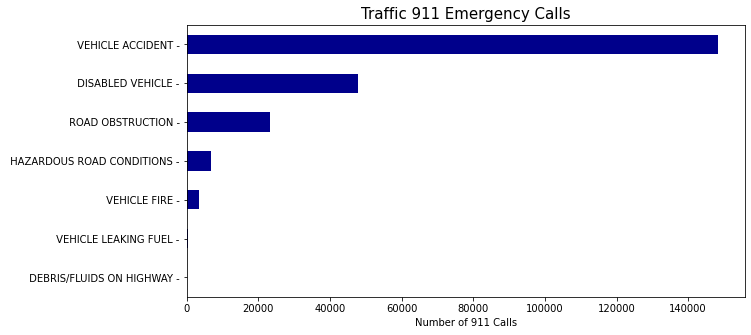

In [21]:
df[df['reason']=='Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)

### Fire 911 Emergency Calls

In [23]:
df[df['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

### EMS 911 Emergency Calls

Text(0.5, 1.0, 'EMS 911 Emergency Calls')

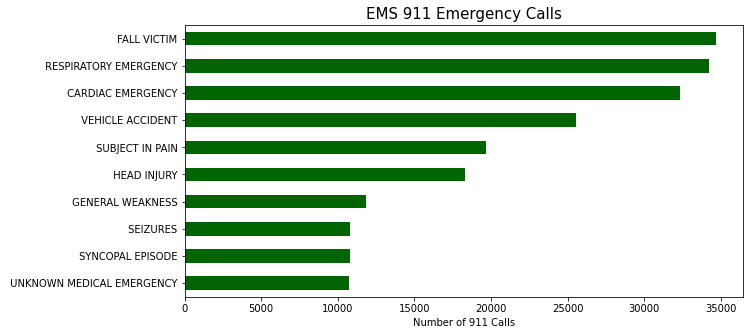

In [24]:
df[df['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)

## Feature Engineering

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
# dictionary string names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

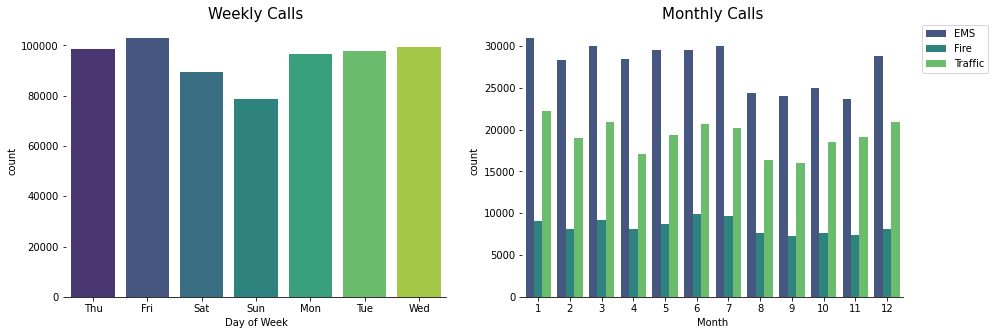

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Day of Week', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=15)
sns.countplot(x='Month', data=df, hue='reason', palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.despine(bottom=False, left=True)

In [28]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

### Traffic

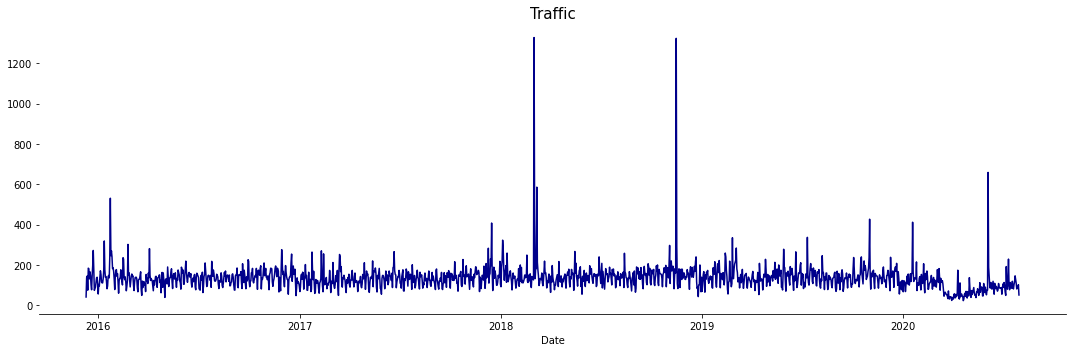

In [29]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkblue')
plt.title('Traffic', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

### Fire

In [30]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkred')
plt.title('Fire', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

### EMS

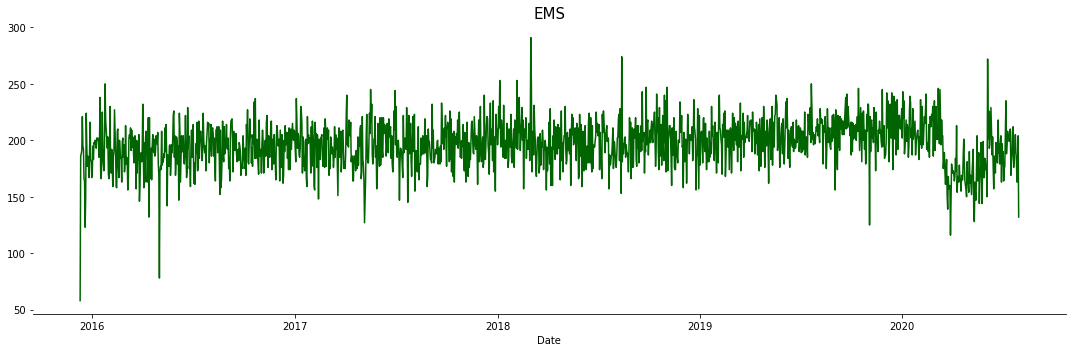

In [31]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkgreen')
plt.title('EMS', fontsize=15)
sns.despine(bottom=False, left=True)
plt.tight_layout()

## Heatmap

In [33]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()

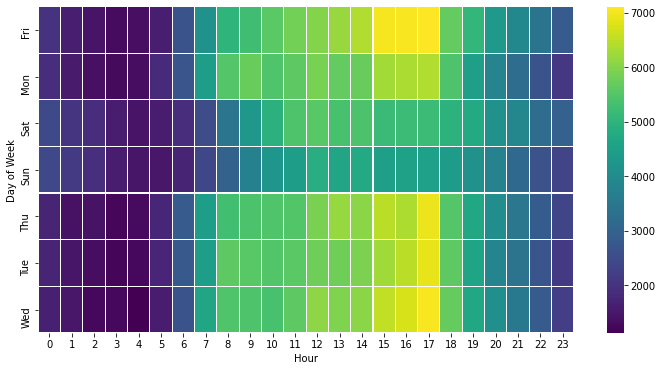

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis', linewidths=0.05)

## Clustermap

<Figure size 864x432 with 0 Axes>

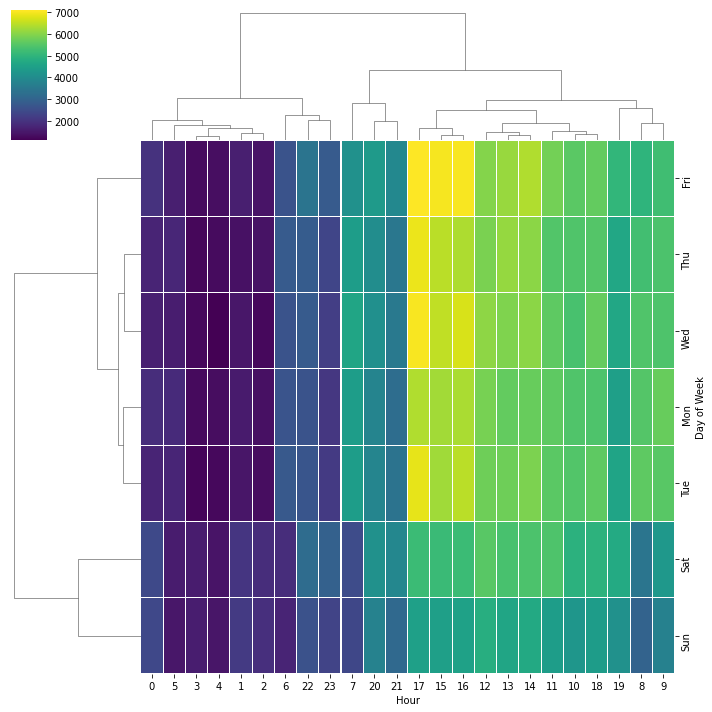

In [35]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='viridis', linewidths=0.05)